<a href="https://colab.research.google.com/github/Zuckmo/Image-Processing/blob/main/Image_Processing_to_Determine_Whether_It_Is_Clean_or_Messy_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [21]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-05-02 04:16:26--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 172.64.145.29, 104.18.42.227, 2606:4700:4400::6812:2ae3, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|172.64.145.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  93.5MB/s    in 0.7s    

2024-05-02 04:16:27 (93.5 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [22]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = "/tmp/images"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")

In [23]:
# Dapatkan daftar nama-nama file dan direktori dalam direktori yang ditentukan
os.listdir(train_dir)

['clean', 'messy']

In [24]:
os.listdir(validation_dir)

['clean', 'messy']

In [25]:
import os
import zipfile

# Path ke file ZIP
local_zip = '/tmp/messy_vs_clean_room.zip'

# Ekstraksi file ZIP ke direktori sementara
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp')

# Direktori temporer setelah ekstraksi
extracted_dir = '/tmp'

# Menampilkan isi direktori temporer
print("Isi dari direktori temporer setelah ekstraksi:")
for item in os.listdir(extracted_dir):
    print(item)


Isi dari direktori temporer setelah ekstraksi:
language_service.WARNING
debugger_1eve27rva7
messy_vs_clean_room.zip
dap_multiplexer.aa17e2a3b5a1.root.log.INFO.20240502-030512.82
language_service.aa17e2a3b5a1.root.log.ERROR.20240502-040320.322
pyright-335-cH5chLc5OS9a
images
language_service.INFO
tmptabic9_x
python-languageserver-cancellation
pyright-335-LTpqUkOe5bsa
initgoogle_syslog_dir.0
language_service.aa17e2a3b5a1.root.log.INFO.20240502-030600.322
language_service.aa17e2a3b5a1.root.log.WARNING.20240502-040320.322
language_service.ERROR
dap_multiplexer.INFO
tmpf241k7cl


In [26]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [27]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./225, horizontal_flip=True, rotation_range=20, shear_range=0.2, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./225)

In [28]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode="rgb",
    batch_size=4,
    class_mode="binary"
)

Found 192 images belonging to 2 classes.


In [29]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    color_mode="rgb",
    batch_size=4,
    class_mode="binary"
)

Found 20 images belonging to 2 classes.


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [33]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.optimizers.Adam(),
    metrics=["Accuracy"]
)

In [34]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 10s - loss: 0.7737 - Accuracy: 0.5800 - val_loss: 0.6739 - val_Accuracy: 0.8500 - 10s/epoch - 408ms/step
Epoch 2/25
25/25 - 8s - loss: 0.6966 - Accuracy: 0.6300 - val_loss: 0.7134 - val_Accuracy: 0.5000 - 8s/epoch - 319ms/step
Epoch 3/25
25/25 - 9s - loss: 0.6768 - Accuracy: 0.5500 - val_loss: 0.6681 - val_Accuracy: 0.8000 - 9s/epoch - 361ms/step
Epoch 4/25
25/25 - 17s - loss: 0.6263 - Accuracy: 0.6400 - val_loss: 0.5423 - val_Accuracy: 0.8500 - 17s/epoch - 694ms/step
Epoch 5/25
25/25 - 10s - loss: 0.6257 - Accuracy: 0.6800 - val_loss: 0.5058 - val_Accuracy: 0.8000 - 10s/epoch - 398ms/step
Epoch 6/25
25/25 - 11s - loss: 0.6581 - Accuracy: 0.5700 - val_loss: 0.5997 - val_Accuracy: 0.6500 - 11s/epoch - 440ms/step
Epoch 7/25
25/25 - 11s - loss: 0.6272 - Accuracy: 0.6500 - val_loss: 0.5964 - val_Accuracy: 0.6500 - 11s/epoch - 430ms/step
Epoch 8/25
25/25 - 9s - loss: 0.6026 - Accuracy: 0.6800 - val_loss: 0.5481 - val_Accuracy: 0.8000 - 9s/epoch - 379ms/step
Epoch 9/25
25/

In [39]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



In [47]:
uploaded = files.upload()


Saving WhatsApp Image 2023-05-10 at 14.54.49.jpeg to WhatsApp Image 2023-05-10 at 14.54.49.jpeg


1/1 [==============================] - 0s 32ms/step
WhatsApp Image 2023-05-10 at 14.54.49.jpeg
messy


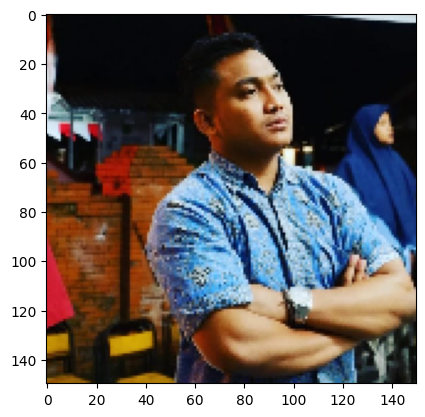

In [48]:
 # predicting images
 for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==1:
   print('messy')
  else:
   print('clean')